
- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [9]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags

In [10]:
with open('data/AK_Juneau_1.json') as f:
   data = json.load(f)
data

{'status': 200,
 'data': {'total': 8,
  'count': 7,
  'results': [{'primary_photo': None,
    'last_update_date': None,
    'source': None,
    'tags': None,
    'permalink': '8477-Thunder-Mountain-Rd_Juneau_AK_99801_M94249-83842',
    'status': 'sold',
    'list_date': None,
    'open_houses': None,
    'description': {'year_built': None,
     'baths_3qtr': None,
     'sold_date': '2023-08-22',
     'sold_price': None,
     'baths_full': None,
     'name': None,
     'baths_half': None,
     'lot_sqft': None,
     'sqft': None,
     'baths': None,
     'sub_type': None,
     'baths_1qtr': None,
     'garage': None,
     'stories': None,
     'beds': None,
     'type': None},
    'branding': [{'name': None, 'photo': None, 'type': 'Office'}],
    'list_price': None,
    'lead_attributes': {'show_contact_an_agent': True},
    'property_id': '9424983842',
    'photos': None,
    'flags': {'is_new_construction': None,
     'is_for_rent': None,
     'is_subdivision': None,
     'is_continge

In [11]:
# Function to get nested values
def get_nested_value(data, *keys):
    try:
        for key in keys:
            data = data[key]
        return data
    except (TypeError, KeyError):
        return None

# Function to convert JSON to DataFrame
def json_to_dataframe(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    results = get_nested_value(data, 'data', 'results')
    if results is None:
        return pd.DataFrame()

    df = pd.json_normalize(results)
    return df

# Folder path containing JSON files
json_path = 'data'

# List of JSON files in the folder
json_files = [json for json in os.listdir(json_path) if json.endswith('.json')]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate through each JSON file
for js in json_files:
    # Construct the full path to the JSON file
    json_file_path = os.path.join(json_path, js)

    # Apply the json_to_dataframe function to extract data from the current JSON file
    json_data = json_to_dataframe(json_file_path)

    # Concatenate the extracted data to the combined_data DataFrame
    combined_data = pd.concat([combined_data, json_data], ignore_index=True)

# Display the combined DataFrame
print(combined_data)

/var/folders/7y/xbwztrr130jff2n00m2fjrsc0000gn/T/ipykernel_83372/2205081171.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([combined_data, json_data], ignore_index=True)
/var/folders/7y/xbwztrr130jff2n00m2fjrsc0000gn/T/ipykernel_83372/2205081171.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([combined_data, json_data], ignore_index=True)
/var/folders/7y/xbwztrr130jff2n00m2fjrsc0000gn/T/ipykernel_83372/2205081171.py:40: FutureWarning

          last_update_date  ... location.county
0     2024-01-17T00:01:55Z  ...             NaN
1     2024-01-16T16:49:36Z  ...             NaN
2     2024-01-13T00:03:39Z  ...             NaN
3     2024-01-16T07:48:30Z  ...             NaN
4     2024-01-13T00:01:45Z  ...             NaN
...                    ...  ...             ...
8186                  None  ...             NaN
8187  2023-08-22T17:54:39Z  ...             NaN
8188  2023-08-18T19:18:03Z  ...             NaN
8189  2023-08-17T19:23:27Z  ...             NaN
8190  2023-08-16T20:05:03Z  ...             NaN

[8191 rows x 67 columns]


In [12]:
filter_words = ['state','city', 'tags', 'sold_price', 'property_id', 'built', 'sqft', 'baths^', 'beds', 'description.type']
filtered_columns = [col for col in combined_data.columns if any(word in col for word in filter_words)]
filtered_df = combined_data[filtered_columns]
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tags                         7638 non-null   object 
 1   property_id                  8159 non-null   object 
 2   description.year_built       7316 non-null   float64
 3   description.sold_price       6716 non-null   object 
 4   description.lot_sqft         6991 non-null   float64
 5   description.sqft             7323 non-null   float64
 6   description.beds             7504 non-null   float64
 7   description.type             8125 non-null   object 
 8   location.address.state       8159 non-null   object 
 9   location.address.city        8154 non-null   object 
 10  location.address.state_code  8159 non-null   object 
dtypes: float64(4), object(7)
memory usage: 704.0+ KB


At this point, ensure that you have all sales in a dataframe.
- Is each cell one value, or do some cells have lists?
- Maybe the "tags" will help create some features.
- What are the data types of each column?
- Some sales may not actually include the sale price.  These rows should be dropped.
- Some sales don't include the property type.
- There are a lot of None values.  Should these be dropped or replaced with something?

In [ ]:
# load and concatenate data here
# drop or replace values as necessary

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [13]:
# One hot encoding for the tags data
dummy_df = pd.get_dummies(filtered_df['tags'].explode()).groupby(level=0).sum()
ones_count_per_column = dummy_df.sum(axis=0)
threshold = 400
selected_columns = ones_count_per_column[ones_count_per_column >= threshold].index

# Concatenating the dummy data and the dataframe and removing tags column
combined_df = pd.concat([filtered_df, dummy_df[selected_columns]], axis=1)

# Dropping the 'tags' column
combined_df = combined_df.drop(columns=['tags'])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_id                  8159 non-null   object 
 1   description.year_built       7316 non-null   float64
 2   description.sold_price       6716 non-null   object 
 3   description.lot_sqft         6991 non-null   float64
 4   description.sqft             7323 non-null   float64
 5   description.beds             7504 non-null   float64
 6   description.type             8125 non-null   object 
 7   location.address.state       8159 non-null   object 
 8   location.address.city        8154 non-null   object 
 9   location.address.state_code  8159 non-null   object 
 10  basement                     8191 non-null   int64  
 11  big_lot                      8191 non-null   int64  
 12  big_yard                     8191 non-null   int64  
 13  carport           

In [14]:
combined_df.head()

,property_id,description.year_built,description.sold_price,description.lot_sqft,description.sqft,description.beds,description.type,location.address.state,location.address.city,location.address.state_code,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,hill_or_mountain_view,laundry_room,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer
0,3300959879,2001.0,345000,22651.0,1539.0,3.0,single_family,Pennsylvania,Harrisburg,PA,1,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,3149247078,1900.0,196000,2614.0,2429.0,3.0,multi_family,Pennsylvania,Harrisburg,PA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,4686076173,1971.0,205000,13504.0,1120.0,3.0,single_family,Pennsylvania,Harrisburg,PA,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,4085014275,2013.0,295000,2688.0,2400.0,3.0,townhomes,Pennsylvania,Harrisburg,PA,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3743385520,1900.0,106000,871.0,1478.0,3.0,multi_family,Pennsylvania,Harrisburg,PA,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE such as using central tendency?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- If you replace cities or states with numerical values, make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Drop columns that aren't needed.
- Don't keep the list price because it will be too close to the sale price.

In [ ]:
# perform train test split here
# do something with state and city
# drop any other not needed columns

**STRETCH**

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [ ]:
# import, join and preprocess new data here

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [ ]:
# perform EDA here

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [15]:
dataframe = pd.read_csv('finaldf.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8154 non-null   int64  
 1   list_price                   7716 non-null   float64
 2   property_id                  8154 non-null   int64  
 3   price_reduced_amount         2484 non-null   float64
 4   description.year_built       7311 non-null   float64
 5   description.sold_price       6711 non-null   float64
 6   description.lot_sqft         6986 non-null   float64
 7   description.sqft             7318 non-null   float64
 8   description.stories          6255 non-null   float64
 9   description.beds             7499 non-null   float64
 10  description.type             8120 non-null   object 
 11  location.address.state       8154 non-null   object 
 12  location.address.state_code  8154 non-null   object 
 13  basement          

In [16]:
import datetime as dt

#Extracting the present year 
current_year = dt.datetime.now().year

#Calculating the age of property
dataframe['age'] = current_year - dataframe['description.year_built']
dataframe = dataframe.drop(columns=['description.year_built'])
dataframe.sample(10)

,Unnamed: 0,list_price,property_id,price_reduced_amount,description.sold_price,description.lot_sqft,description.sqft,description.stories,description.beds,description.type,location.address.state,location.address.state_code,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,hill_or_mountain_view,laundry_room,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,mean,median,std,age
5094,5094,NaN,8224145465,NaN,NaN,8400.0,NaN,NaN,3.0,single_family,Kansas,KS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,72.0
8148,8148,325000.0,4078885635,NaN,330000.0,9583.0,2160.0,2.0,4.0,single_family,Indiana,IN,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,257442.121951,240000.0,127092.531111,72.0
4462,4462,204900.0,8511834017,NaN,195000.0,4587.0,1359.0,1.0,3.0,single_family,Minnesota,MN,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,361721.218274,248000.0,302984.225155,133.0
2207,2207,165000.0,9063303213,NaN,165000.0,NaN,556.0,NaN,1.0,condo_townhome_rowhome_coop,South Carolina,SC,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,199196.021127,220000.0,114700.124641,94.0
3022,3022,449000.0,2286898195,NaN,NaN,21824.0,2032.0,2.0,5.0,single_family,Idaho,ID,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,38.0
4880,4880,346000.0,1068206127,16000.0,340000.0,8018.0,1156.0,1.0,2.0,single_family,Arizona,AZ,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,342500.000000,342500.0,2635.231383,45.0
2847,2847,325000.0,4263781295,4000.0,330000.0,17424.0,2414.0,1.0,5.0,single_family,Michigan,MI,1,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,159494.285714,140000.0,95214.114996,20.0
4413,4413,639000.0,7691862344,NaN,644000.0,13939.0,4006.0,2.0,6.0,single_family,Nebraska,NE,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,320165.714286,262500.0,175919.321822,28.0
2978,2978,2600000.0,9210780874,NaN,NaN,21736.0,5008.0,2.0,4.0,single_family,Idaho,ID,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,9.0
4081,4081,210000.0,9350021940,NaN,307000.0,5227.0,6930.0,NaN,2.0,multi_family,Connecticut,CT,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,319073.809524,300000.0,201448.585115,101.0


In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#One-hot encode 'description.type' column
dataframe = pd.get_dummies(dataframe, columns=['description.type'])

#Drop the specified columns before converting to int
columns_to_drop = ['property_id', 'price_reduced_amount', 'description.stories', 'location.address.state', 'location.address.state_code', 'std', 'Unnamed: 0']
dataframe = dataframe.drop(columns=columns_to_drop)

#Convert the one-hot encoded columns to int (assuming they are boolean)
#Replace 'one_hot_encoded_columns' with the actual list of columns created by get_dummies
one_hot_encoded_columns = dataframe.columns[dataframe.columns.str.startswith('description.type')]
dataframe[one_hot_encoded_columns] = dataframe[one_hot_encoded_columns].astype(int)

In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8154 non-null   int64  
 1   list_price                   7716 non-null   float64
 2   property_id                  8154 non-null   int64  
 3   price_reduced_amount         2484 non-null   float64
 4   description.sold_price       6711 non-null   float64
 5   description.lot_sqft         6986 non-null   float64
 6   description.sqft             7318 non-null   float64
 7   description.stories          6255 non-null   float64
 8   description.beds             7499 non-null   float64
 9   description.type             8120 non-null   object 
 10  location.address.state       8154 non-null   object 
 11  location.address.state_code  8154 non-null   object 
 12  basement                     8154 non-null   int64  
 13  big_lot           

In [48]:
dataframe.head()

,Unnamed: 0,property_id,price_reduced_amount,description.sold_price,description.lot_sqft,description.sqft,description.stories,description.beds,description.type,location.address.state,location.address.state_code,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,hill_or_mountain_view,laundry_room,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,mean,median,std,age
0,0,3300959879,NaN,345000.0,22651.0,1539.0,1.0,3.0,single_family,Pennsylvania,PA,1,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,238074.285714,229497.5,133706.451469,23
1,1,3149247078,NaN,196000.0,2614.0,2429.0,NaN,3.0,multi_family,Pennsylvania,PA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,238074.285714,229497.5,133706.451469,124
2,2,4686076173,NaN,205000.0,13504.0,1120.0,1.0,3.0,single_family,Pennsylvania,PA,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,238074.285714,229497.5,133706.451469,53
3,3,4085014275,NaN,295000.0,2688.0,2400.0,2.0,3.0,townhomes,Pennsylvania,PA,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,238074.285714,229497.5,133706.451469,11
4,4,3743385520,NaN,106000.0,871.0,1478.0,NaN,3.0,multi_family,Pennsylvania,PA,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,238074.285714,229497.5,133706.451469,124


In [21]:
#Cleaning the dataset

#Filling the missing sold_price data with listing price
dataframe['description.sold_price'].fillna(dataframe['list_price'], inplace=True)

#Removing rows with nulls/NAn
columns_to_check = ['age', 'description.sold_price', 'description.beds', 'description.lot_sqft', 'description.sqft', 'mean']
dataframe = dataframe.dropna(subset=columns_to_check)

#Turning the age of property into an integer
dataframe['age'] = dataframe['age'].astype(int)

#dropping list_price
dataframe1 = dataframe.drop(columns=['list_price'])

In [45]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5250 entries, 0 to 8153
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   5250 non-null   int64  
 1   property_id                  5250 non-null   int64  
 2   price_reduced_amount         1635 non-null   float64
 3   description.sold_price       5250 non-null   float64
 4   description.lot_sqft         5250 non-null   float64
 5   description.sqft             5250 non-null   float64
 6   description.stories          4410 non-null   float64
 7   description.beds             5250 non-null   float64
 8   description.type             5250 non-null   object 
 9   location.address.state       5250 non-null   object 
 10  location.address.state_code  5250 non-null   object 
 11  basement                     5250 non-null   int64  
 12  big_lot                      5250 non-null   int64  
 13  big_yard               

In [22]:
#renaming columns
finaldf = dataframe.rename(columns={'mean': 'city_mean', 'median': 'city_median'})

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='list_price', y='description.sold_price')
plt.title('Scatter Plot of Sell Price vs Square Footage')
plt.xlabel('Age')
plt.ylabel('Sell Price')
plt.show()

ValueError: Could not interpret value `list_price` for parameter `x`

<Figure size 1000x600 with 0 Axes>

In [26]:
#use the groupby method on this DataFrame
city_sales_stats = filtered_df.groupby('location.address.city')['description.sold_price'].agg(['mean', 'median', 'std'])
city_sales_stats

/anaconda3/envs/testmojave/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/anaconda3/envs/testmojave/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/anaconda3/envs/testmojave/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/anaconda3/envs/testmojave/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/anaconda3/envs/testmojave/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/anaconda3/envs/testmojave/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarnin

,mean,median,std
location.address.city,,,
Albany,241920.053476,245000.0,7.128774e+04
Alexander,148000.0,148000.0,0.000000e+00
Ampthill,120000.0,120000.0,0.000000e+00
Annapolis,714903.990476,460000.0,1.075333e+06
Antelope,399000.0,412000.0,6.786015e+04
...,...,...,...
Tumwater,452000.0,452000.0,0.000000e+00
Verona,463437.5,460000.0,1.434326e+04
West Valley City,NaN,NaN,NaN


In [23]:
finaldf.head()

,Unnamed: 0,property_id,price_reduced_amount,description.sold_price,description.lot_sqft,description.sqft,description.stories,description.beds,description.type,location.address.state,location.address.state_code,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,hill_or_mountain_view,laundry_room,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,city_mean,city_median,std,age
0,0,3300959879,NaN,345000.0,22651.0,1539.0,1.0,3.0,single_family,Pennsylvania,PA,1,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,238074.285714,229497.5,133706.451469,23
1,1,3149247078,NaN,196000.0,2614.0,2429.0,NaN,3.0,multi_family,Pennsylvania,PA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,238074.285714,229497.5,133706.451469,124
2,2,4686076173,NaN,205000.0,13504.0,1120.0,1.0,3.0,single_family,Pennsylvania,PA,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,238074.285714,229497.5,133706.451469,53
3,3,4085014275,NaN,295000.0,2688.0,2400.0,2.0,3.0,townhomes,Pennsylvania,PA,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,238074.285714,229497.5,133706.451469,11
4,4,3743385520,NaN,106000.0,871.0,1478.0,NaN,3.0,multi_family,Pennsylvania,PA,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,238074.285714,229497.5,133706.451469,124


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('model_df.csv')

/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


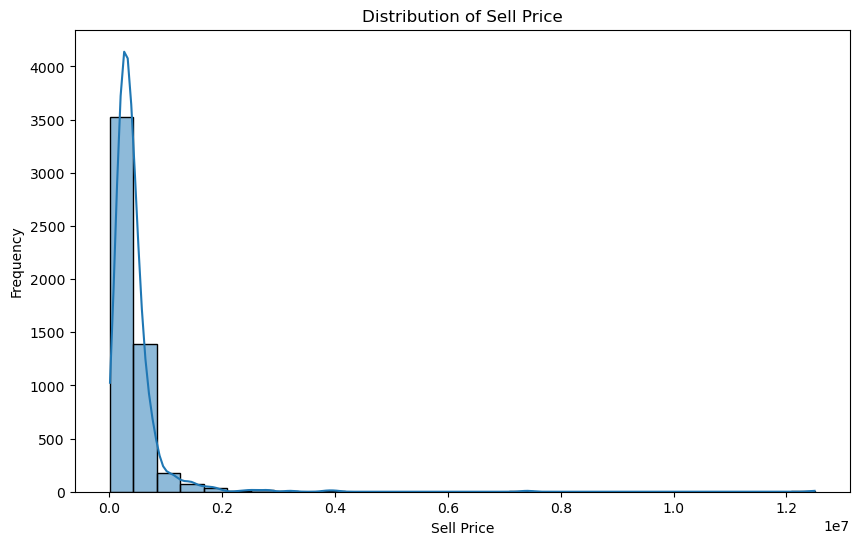

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['description.sold_price'], bins=30, kde=True)
plt.title('Distribution of Sell Price')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.show()

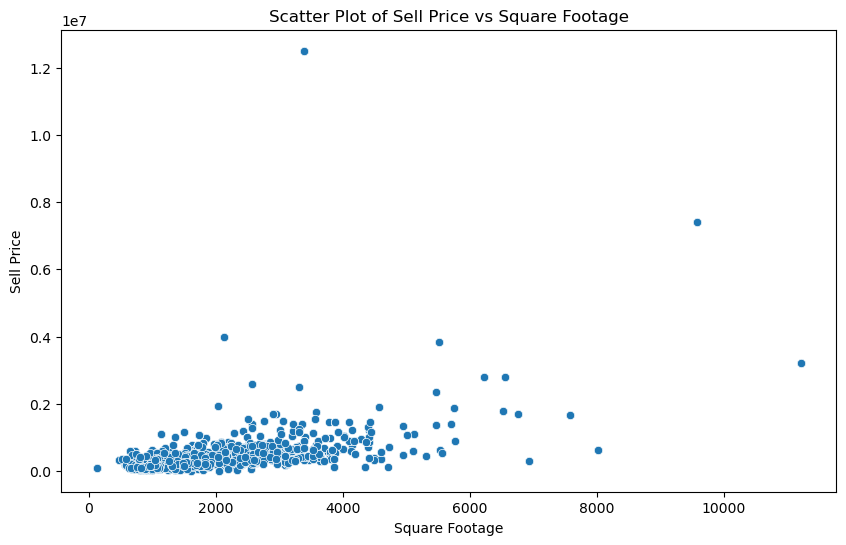

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='description.sqft', y='description.sold_price', data=df)
plt.title('Scatter Plot of Sell Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Sell Price')
plt.show()

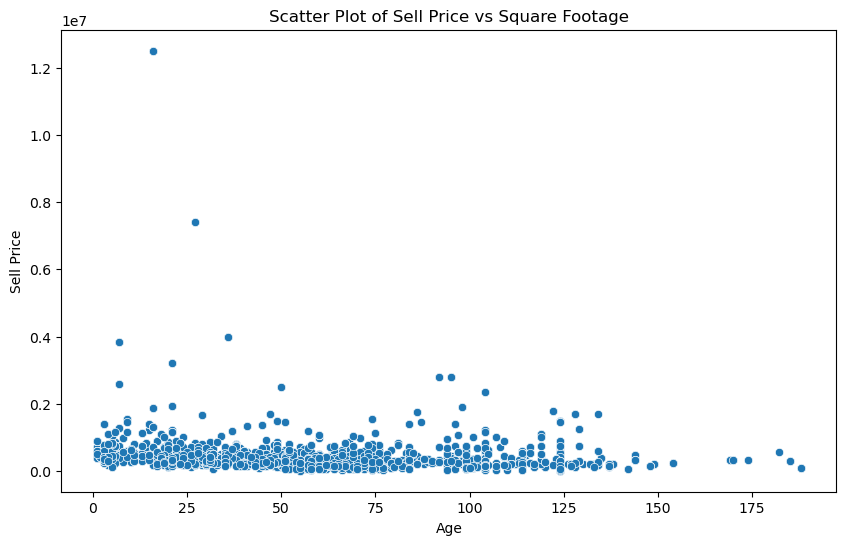

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='description.sold_price', data=df)
plt.title('Scatter Plot of Sell Price vs Square Footage')
plt.xlabel('Age')
plt.ylabel('Sell Price')
plt.show()

/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/anaconda3/envs/testmojave/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

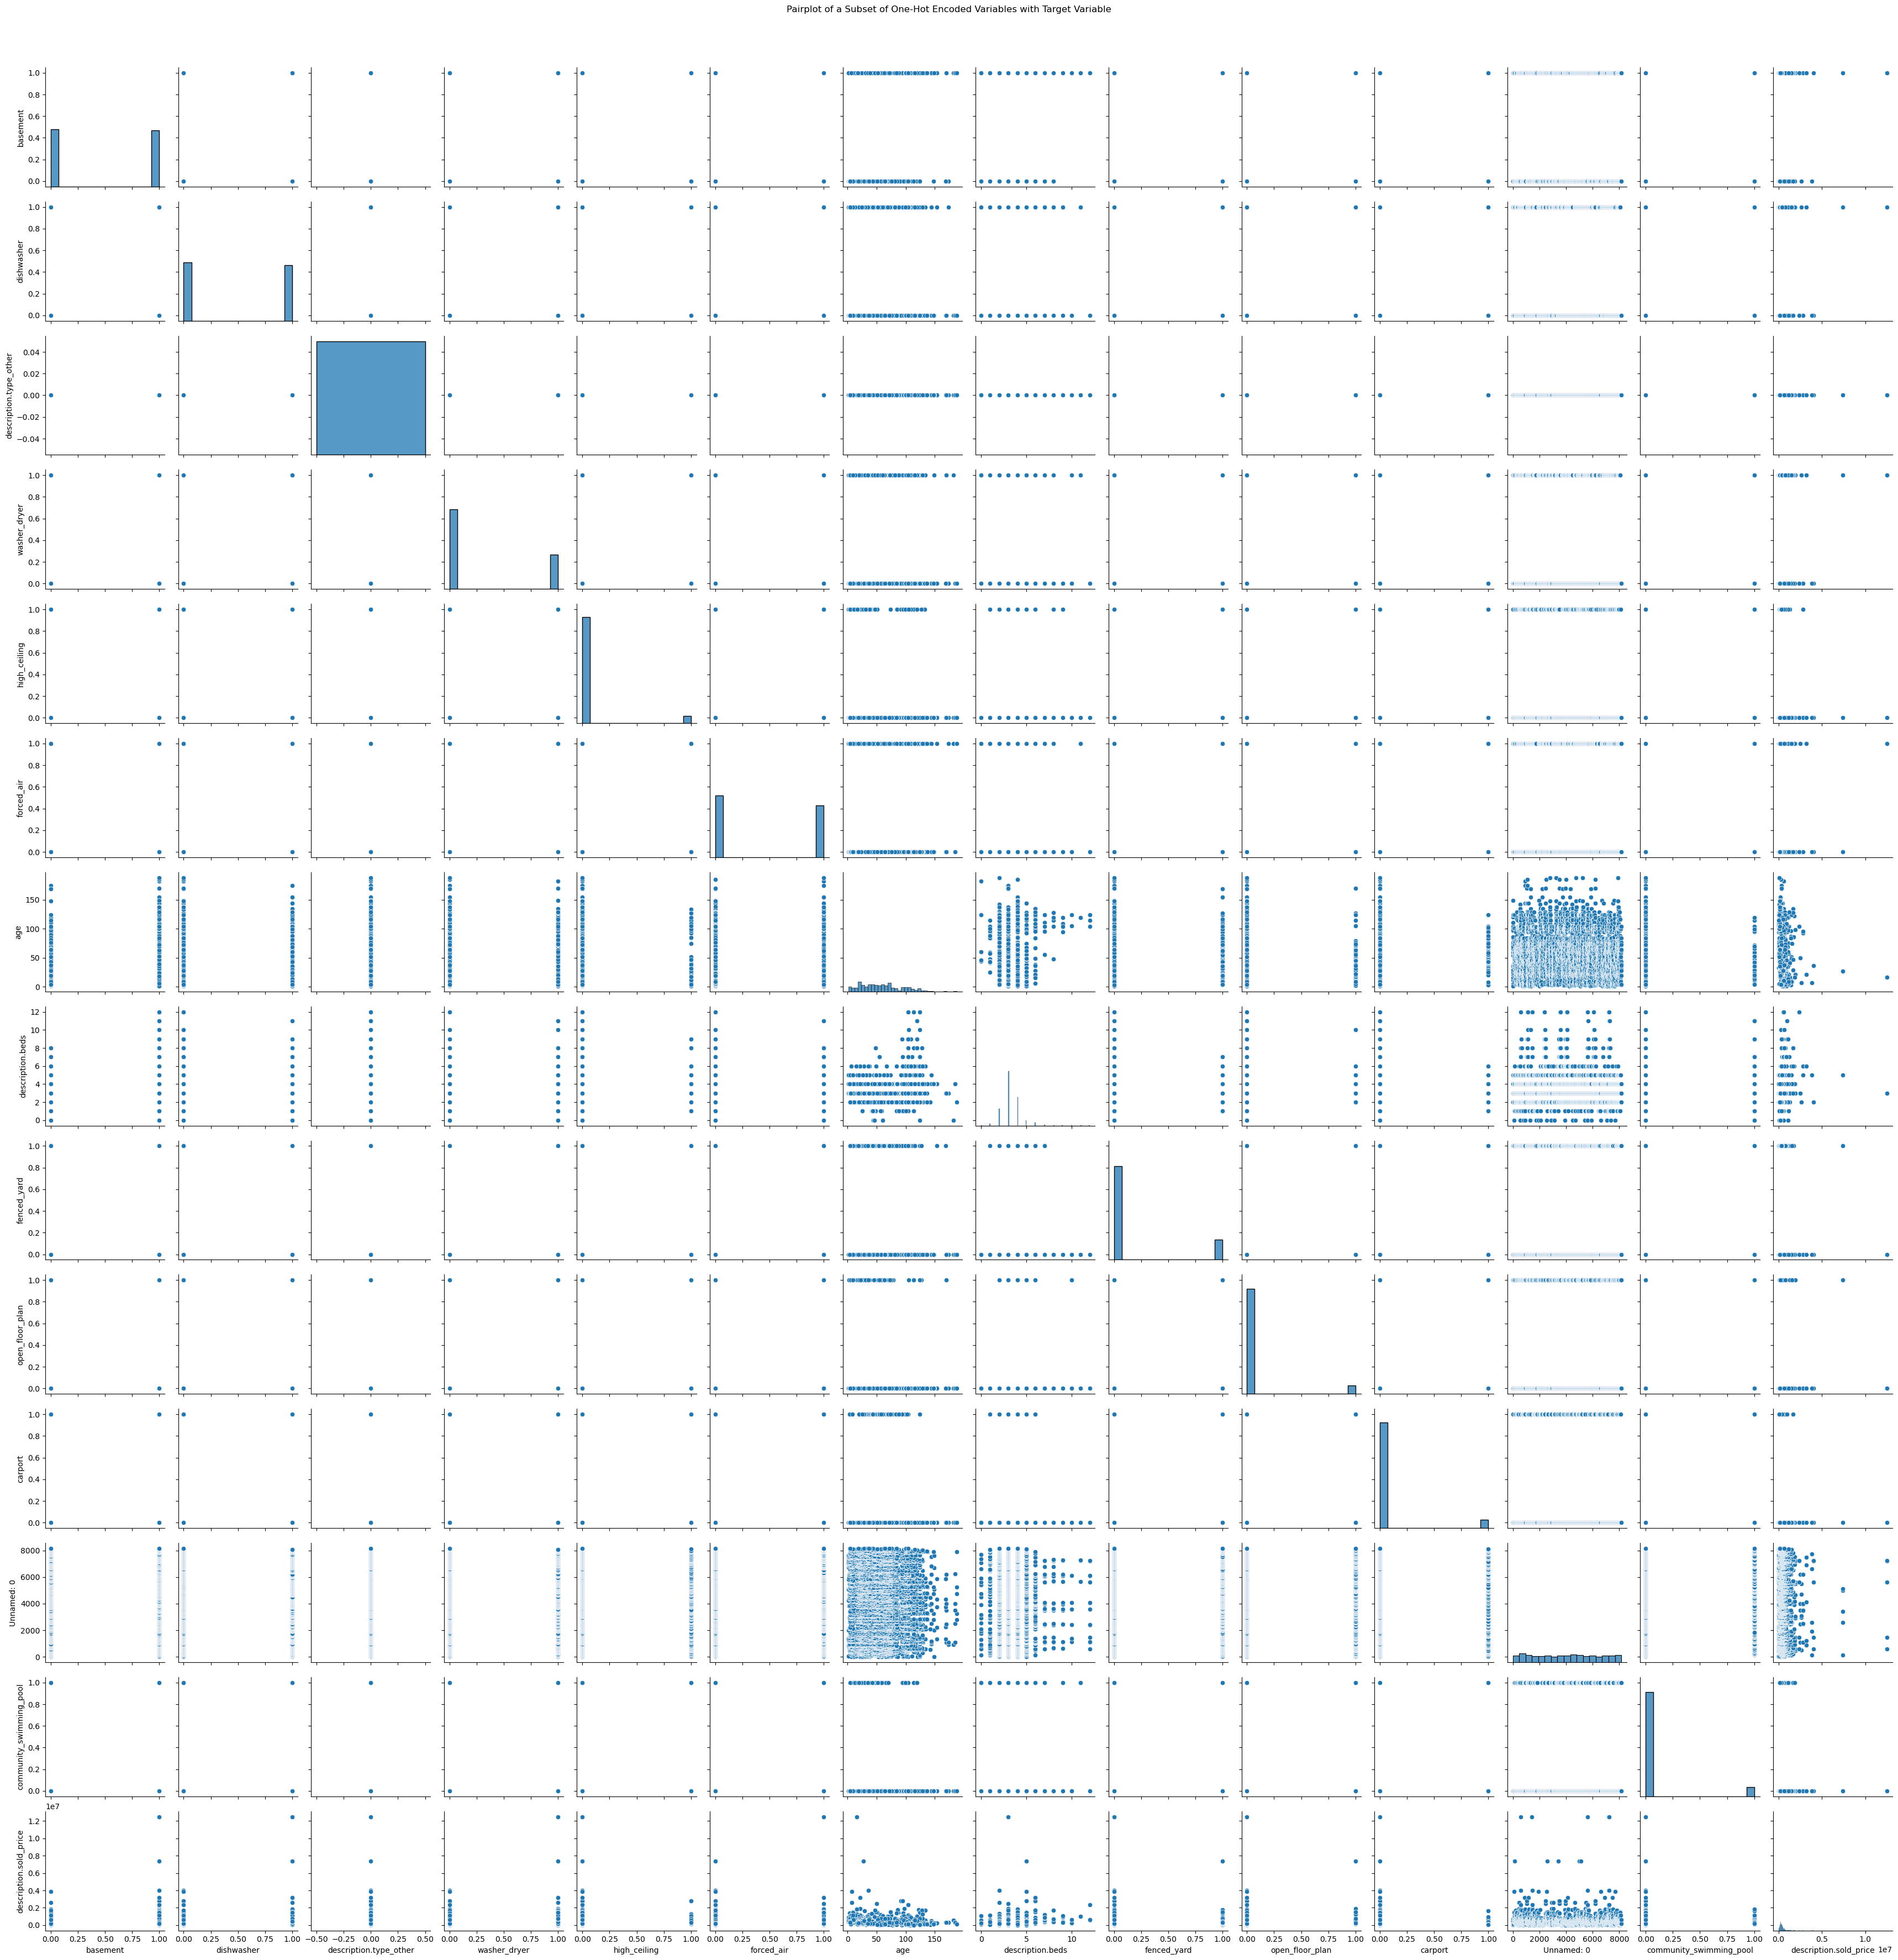

In [38]:
subset_variables = df.sample(frac=0.2, axis=1).columns

# Add the target variable to the subset
subset_variables = subset_variables.append(pd.Index(['description.sold_price']))

# Create a pairplot for the selected variables
sns.pairplot(df[subset_variables])
plt.suptitle('Pairplot of a Subset of One-Hot Encoded Variables with Target Variable', y=1.02)
plt.show()

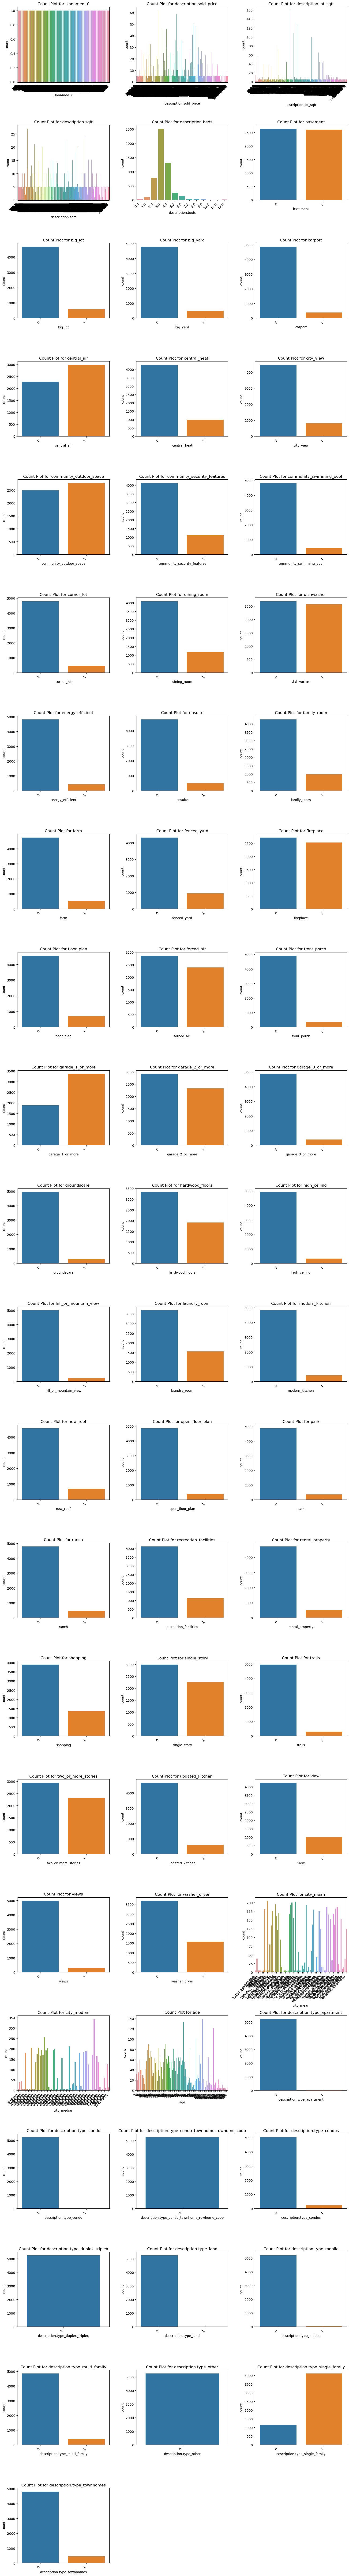

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
finaldf.to_csv('model_df.csv')